<a href="https://colab.research.google.com/github/rsekola/Financial_inclusion_dataset.csv/blob/main/Point_de_contr%C3%B4le_du_r%C3%A9seau_neuronal_artificiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Option 1 : Jeu de données Iris

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [3]:
# Charger le jeu de données Iris
iris = load_iris()
X = iris.data  # caractéristiques : longueur/largeur sépales et pétales
y = iris.target.reshape(-1, 1)  # labels

# Encoder les labels en one-hot (3 classes)
encoder = OneHotEncoder(sparse_output=False)  # Remplacer 'sparse' par 'sparse_output'
y_encoded = encoder.fit_transform(y)

# Normaliser les caractéristiques pour aider l'apprentissage
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [4]:
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # première couche cachée
    Dense(10, activation='relu'),                     # deuxième couche cachée
    Dense(3, activation='softmax')                   # couche de sortie pour 3 classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4463 - loss: 0.9650 - val_accuracy: 0.8333 - val_loss: 0.6887
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7593 - loss: 0.5705 - val_accuracy: 0.8750 - val_loss: 0.4489
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8570 - loss: 0.2831 - val_accuracy: 0.8750 - val_loss: 0.3376
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8217 - loss: 0.3260 - val_accuracy: 0.9167 - val_loss: 0.3107
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9151 - loss: 0.2140 - val_accuracy: 0.9167 - val_loss: 0.2886
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9108 - loss: 0.2297 - val_accuracy: 0.9583 - val_loss: 0.2718
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.0977 - val_accuracy: 0.9583 - val_loss: 0.2914
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.1304 - val_accuracy: 0.9167 - 

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Précision sur le test : {accuracy*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0171
Précision sur le test : 100.00%


Option 2 : Ensemble de données MNIST

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 1. Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 2. Normalisation des images (les pixels sont dans la plage 0-255, donc on les divise par 255 pour les normaliser entre 0 et 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Redimensionner les images pour les adapter au modèle (28x28 -> 28x28x1, car ce sont des images en niveaux de gris)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# 4. Encoder les étiquettes catégorielles (par exemple, 0 -> [1,0,0,0,0,0,0,0,0,0], etc.)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 5. Diviser les données d'entraînement en sous-ensembles d'entraînement et de validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Affichage des formes des données
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (48000, 10)
y_test shape: (10000, 10)


In [9]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 2. Remodeler les images de 28x28 en matrices plates de 784 pixels
x_train = x_train.reshape((x_train.shape[0], 28 * 28))  # 28x28 -> 784
x_test = x_test.reshape((x_test.shape[0], 28 * 28))    # 28x28 -> 784

# 3. Normalisation des valeurs des pixels (valeurs entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 4. Convertir les étiquettes en vecteurs encodés one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 5. Créer un ensemble de validation pour ajuster les hyperparamètres
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Affichage des formes des données
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


x_train shape: (48000, 784)
x_val shape: (12000, 784)
x_test shape: (10000, 784)
y_train shape: (48000, 10)
y_val shape: (12000, 10)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Création du modèle pour MNIST
model_mnist = models.Sequential()

# Couche d'entrée (784 caractéristiques pour les pixels de 28x28)
model_mnist.add(layers.InputLayer(input_shape=(784,)))  # 28x28 pixels -> 784

# Couches cachées avec activation ReLU
model_mnist.add(layers.Dense(128, activation='relu'))  # Première couche cachée
model_mnist.add(layers.Dense(64, activation='relu'))   # Deuxième couche cachée

# Couche de sortie avec activation softmax pour 10 classes
model_mnist.add(layers.Dense(10, activation='softmax'))  # 10 classes pour MNIST

# Compilation du modèle avec l'optimiseur Adam et la perte categorical_crossentropy
model_mnist.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Résumé du modèle
model_mnist.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Création du modèle pour Iris
model_iris = models.Sequential()

# Couche d'entrée (4 caractéristiques pour Iris)
model_iris.add(layers.InputLayer(input_shape=(4,)))  # 4 caractéristiques pour Iris

# Couches cachées avec activation ReLU
model_iris.add(layers.Dense(64, activation='relu'))  # Première couche cachée
model_iris.add(layers.Dense(32, activation='relu'))  # Deuxième couche cachée

# Couche de sortie avec activation softmax pour 3 classes
model_iris.add(layers.Dense(3, activation='softmax'))  # 3 classes pour Iris

# Compilation du modèle avec l'optimiseur Adam et la perte categorical_crossentropy
model_iris.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Résumé du modèle
model_iris.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Redimensionner et normaliser les images
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

# Encodage des étiquettes en one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Diviser les données d'entraînement en entraînement et validation
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Création du modèle
model_mnist = models.Sequential()
model_mnist.add(layers.InputLayer(input_shape=(784,)))  # 28x28 -> 784
model_mnist.add(layers.Dense(128, activation='relu'))
model_mnist.add(layers.Dense(64, activation='relu'))
model_mnist.add(layers.Dense(10, activation='softmax'))

# Compilation du modèle
model_mnist.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Entraînement du modèle avec validation
history = model_mnist.fit(x_train, y_train,
                          epochs=10, batch_size=32,
                          validation_data=(x_val, y_val))

# Résumé du modèle
model_mnist.summary()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8705 - loss: 0.4529 - val_accuracy: 0.9599 - val_loss: 0.1374
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1172 - val_accuracy: 0.9709 - val_loss: 0.1017
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0725 - val_accuracy: 0.9720 - val_loss: 0.0922
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0517 - val_accuracy: 0.9748 - val_loss: 0.0847
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0402 - val_accuracy: 0.9744 - val_loss: 0.0896
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0359 - val_accuracy: 0.9762 - val_loss: 0.1014
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9734 - val_loss: 0.1036
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9924 - loss: 0.0220 - 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

313/313 - 2s - 5ms/step - accuracy: 0.9779 - loss: 0.0907
Perte sur l'ensemble de test : 0.0907
Précision sur l'ensemble de test : 0.9779
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



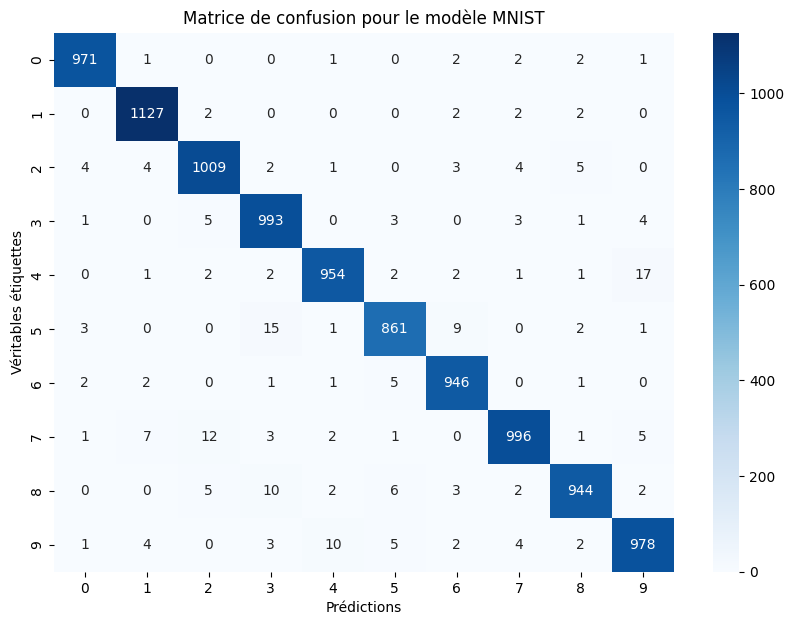

In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model_mnist.evaluate(x_test, y_test, verbose=2)

print(f"Perte sur l'ensemble de test : {test_loss:.4f}")
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")

# Prédire les labels sur l'ensemble de test
y_pred = model_mnist.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Récupérer la classe prédite avec la plus haute probabilité

# Vraies étiquettes (sans transformation one-hot)
y_true = np.argmax(y_test, axis=1)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_true, y_pred_classes))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.title('Matrice de confusion pour le modèle MNIST')
plt.show()
